# Exchange Rate USD/INR Time Series Analysis. 

### Data Description

The dataset used in this analysis contains historical exchange rate data for various currencies against the Indian Rupee (INR). The data spans from January 3, 2000, to December 29, 2023, and includes a total of 6,357 data instances.

Key details of the dataset:
- **Date Range:** 2000-01-03 to 2023-12-29
- **Total Instances:** 6,357
- **Currency Exchange Rates:** Includes exchange rates for multiple currencies against INR

For this analysis, we specifically focus on the USD to INR exchange rate, extracted from the larger dataset.

### Objective

The primary objective of this project is to develop a time series forecasting model for predicting the USD to INR exchange rate. The analysis will involve the following:

1. **Exploratory Data Analysis (EDA):** Understanding the characteristics and patterns in the exchange rate data.
2. **Statistical Modeling:** Applying traditional time series methods to forecast future values.
3. **Machine Learning Techniques:** Implementing machine learning models to improve prediction accuracy.
4. **Evaluation:** Comparing the performance of statistical and machine learning models to select the best approach for forecasting.

By the end of this project, we aim to build robust forecasting models that can accurately predict future exchange rates based on historical data.


In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

import datetime as dt
from datetime import date
import time

import random
import math

from statsmodels.tsa.stattools import adfuller,acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict

!pip install pmdarima
from pmdarima import auto_arima

from sklearn.preprocessing import MinMaxScaler

In [52]:
data = pd.read_csv('ForEx Rates 2000.csv')

In [53]:
data.head()

,Date,USD,AUS,CAN,SWF,DKK,EUR,GBP,HKD,IDR,...,ISK,MXN,PHP,PKR,PLN,RUB,SAR,TRY,VEF,BHD
0,2023-12-29,83.186,56.679,62.821,98.871,12.3174,88.962,105.922,10.6569,0.005405,...,0.6117,4.8961,1.5014,0.2990,21.11,0.9321,22.18,2.82,2.32,220.640
1,2023-12-28,83.169,56.796,62.850,98.448,12.3411,89.245,105.874,10.6433,0.005341,...,0.6122,4.8998,1.4945,0.2939,21.20,0.9397,22.18,2.82,2.32,220.578
2,2023-12-27,83.263,56.993,63.025,98.722,12.4011,89.069,106.534,10.6607,0.005414,...,0.6129,4.9187,1.4962,0.2949,21.39,0.9087,22.20,2.83,2.31,220.819
3,2023-12-26,83.158,56.747,63.018,97.398,12.3155,89.258,105.827,10.6495,0.005399,...,0.6094,4.8957,1.4989,0.2945,21.21,0.9074,22.17,2.84,2.31,220.508
4,2023-12-25,83.164,56.518,62.756,97.086,12.2775,89.081,105.527,10.6451,0.005377,...,0.6076,4.8777,1.5009,0.2976,21.06,0.9039,22.17,2.83,2.32,220.588


In [54]:
data.tail()

,Date,USD,AUS,CAN,SWF,DKK,EUR,GBP,HKD,IDR,...,ISK,MXN,PHP,PKR,PLN,RUB,SAR,TRY,VEF,BHD
6253,2000-01-07,43.485,28.436,29.798,27.994,6.0317,44.8990,71.411,5.5916,NaN,...,NaN,4.5416,NaN,NaN,10.67,1.5846,11.60,80.94,NaN,115.3595
6254,2000-01-06,43.490,28.640,30.003,27.968,6.0314,44.8665,71.177,5.5915,NaN,...,NaN,4.5680,NaN,NaN,10.65,1.5957,11.60,81.07,NaN,115.3580
6255,2000-01-05,43.490,28.482,29.944,27.953,6.0228,44.8345,71.106,5.5907,NaN,...,NaN,4.5387,NaN,NaN,10.53,1.5812,11.59,80.55,NaN,115.3255
6256,2000-01-04,43.480,28.596,30.026,27.758,5.9918,44.5840,NaN,5.5856,NaN,...,NaN,4.6182,NaN,NaN,10.55,1.5853,11.58,NaN,NaN,115.2150
6257,2000-01-03,43.435,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,10.50,NaN,NaN,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6258 entries, 0 to 6257
Data columns (total 36 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    6258 non-null   object 
 1   USD     6258 non-null   float64
 2   AUS     6257 non-null   float64
 3   CAN     6257 non-null   float64
 4   SWF     6257 non-null   float64
 5   DKK     6257 non-null   float64
 6   EUR     6257 non-null   float64
 7   GBP     6256 non-null   float64
 8   HKD     6257 non-null   float64
 9   IDR     4340 non-null   float64
 10  JPY     6257 non-null   float64
 11  KRW     4241 non-null   float64
 12  MYR     6256 non-null   float64
 13  NOK     6257 non-null   float64
 14  NZD     6257 non-null   float64
 15  SEK     6258 non-null   float64
 16  SGD     6257 non-null   float64
 17  THB     4789 non-null   float64
 18  TWD     4789 non-null   float64
 19  ZAR     6256 non-null   float64
 20  AED     6257 non-null   float64
 21  ARS     6244 non-null   float64
 22  

In [5]:
data.sort_values('Date', inplace = True)

In [6]:
data['Date'] = pd.to_datetime(data['Date'])
data = data.set_index('Date')
data.head()

,USD,AUS,CAN,SWF,DKK,EUR,GBP,HKD,IDR,JPY,...,ISK,MXN,PHP,PKR,PLN,RUB,SAR,TRY,VEF,BHD
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,43.435,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,10.50,NaN,NaN,NaN,NaN,NaN
2000-01-04,43.480,28.596,30.026,27.758,5.9918,44.5840,NaN,5.5856,NaN,0.4276,...,NaN,4.6182,NaN,NaN,10.55,1.5853,11.58,NaN,NaN,115.2150
2000-01-05,43.490,28.482,29.944,27.953,6.0228,44.8345,71.106,5.5907,NaN,0.4211,...,NaN,4.5387,NaN,NaN,10.53,1.5812,11.59,80.55,NaN,115.3255
2000-01-06,43.490,28.640,30.003,27.968,6.0314,44.8665,71.177,5.5915,NaN,0.4170,...,NaN,4.5680,NaN,NaN,10.65,1.5957,11.60,81.07,NaN,115.3580
2000-01-07,43.485,28.436,29.798,27.994,6.0317,44.8990,71.411,5.5916,NaN,0.4132,...,NaN,4.5416,NaN,NaN,10.67,1.5846,11.60,80.94,NaN,115.3595


In [7]:
# to find those columns which has more than 8% values empty

empty_cols = [col for col in data.columns if 100*data[col].isnull().sum()/len(data) > 8]
print(empty_cols)
print(100*data[empty_cols].isnull().sum()/len(data))

['IDR', 'KRW', 'THB', 'TWD', 'CNY', 'HUF', 'ILS', 'ISK', 'PHP', 'PKR', 'VEF']
IDR    30.648770
KRW    32.230745
THB    23.473953
TWD    23.473953
CNY    23.633749
HUF    23.473953
ILS    41.530841
ISK    41.530841
PHP    41.530841
PKR    29.833813
VEF    99.296900
dtype: float64


In [8]:
data.drop(empty_cols, axis = 1, inplace = True)

In [9]:
df = data.copy()
df.shape

(6258, 24)

In [10]:
df = df.interpolate(method = 'bfill')
df.isnull().sum()

USD    0
AUS    0
CAN    0
SWF    0
DKK    0
EUR    0
GBP    0
HKD    0
JPY    0
MYR    0
NOK    0
NZD    0
SEK    0
SGD    0
ZAR    0
AED    0
ARS    0
BRL    0
MXN    0
PLN    0
RUB    0
SAR    0
TRY    0
BHD    0
dtype: int64

<Axes: xlabel='Date'>

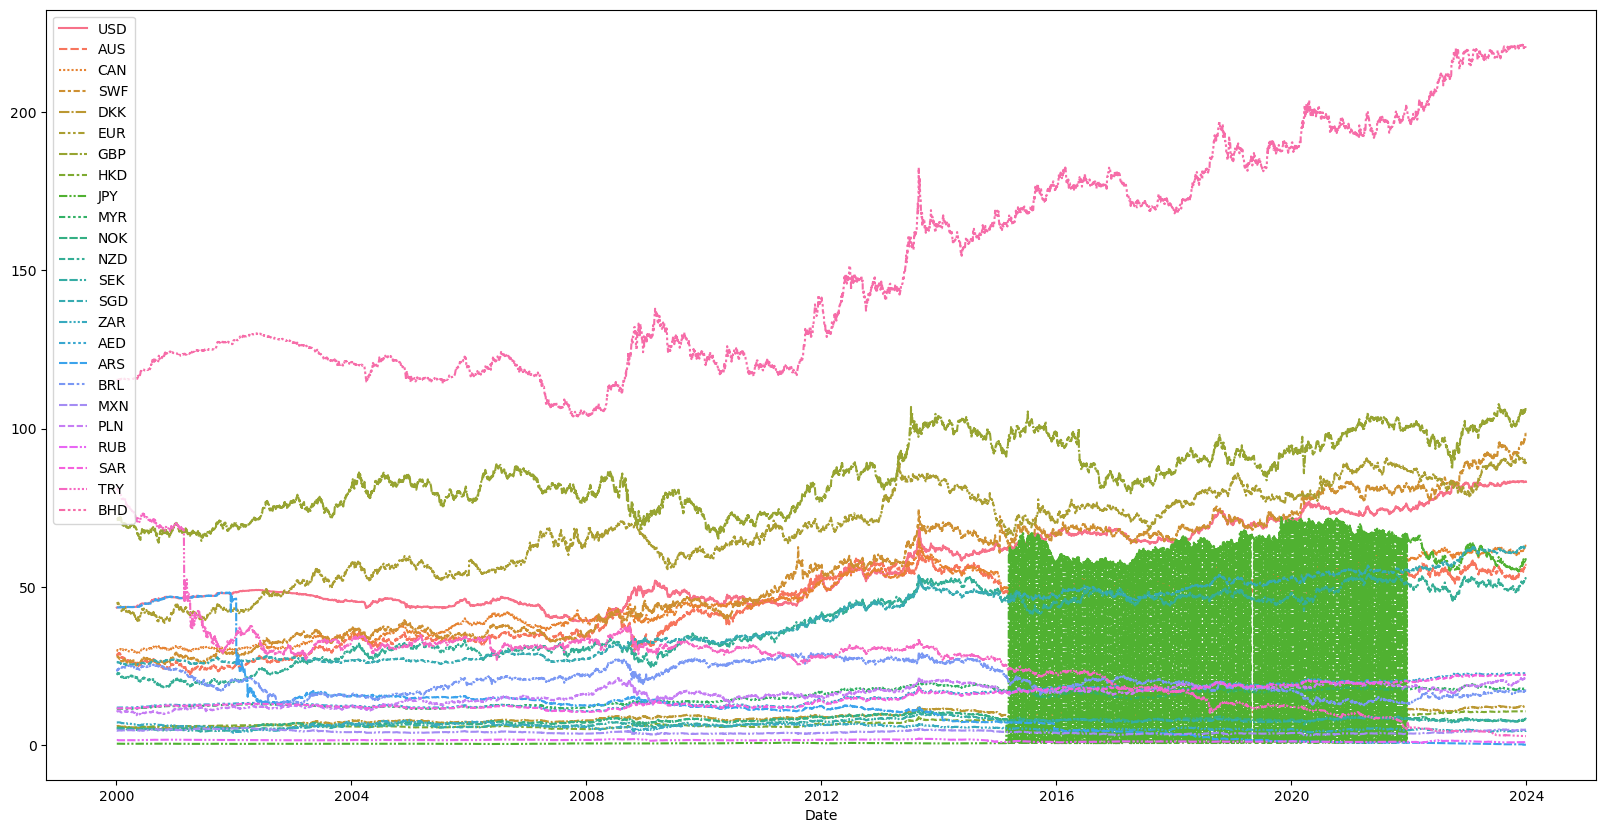

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(20,10))
sns.lineplot(df[:])

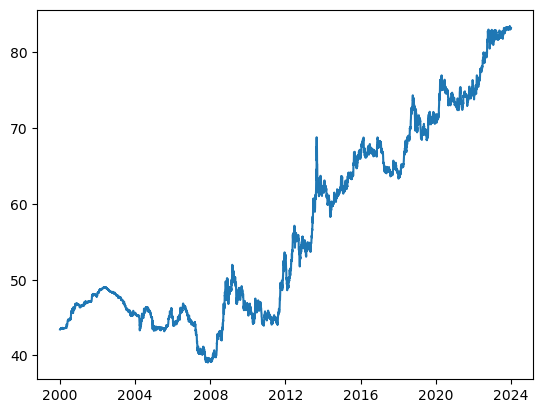

In [12]:
plt.plot(df['USD'])
plt.show()

In [13]:
df_usd = df[['USD']]
df_usd.head()

,USD
Date,
2000-01-03,43.435
2000-01-04,43.480
2000-01-05,43.490
2000-01-06,43.490
2000-01-07,43.485


In [14]:
type(df_usd)

pandas.core.frame.DataFrame

### Data Resampling:
data resampling is needed as currunt data is not consist data for weekends and holidays so need to interplolate those values.

In [15]:
# Create a date range covering the entire period of your dataset
full_date_range = pd.date_range(start=df_usd.index.min(), end=df_usd.index.max(), freq='D')


In [16]:
# Reindex your DataFrame to the new date range
df_usd_resampled = df_usd.reindex(full_date_range)
df_usd_resampled.head()

,USD
2000-01-03,43.435
2000-01-04,43.480
2000-01-05,43.490
2000-01-06,43.490
2000-01-07,43.485


In [17]:
df_usd_resampled.isnull().sum()

USD    2504
dtype: int64

In [18]:
df_usd_resampled.isnull().mean() * 100

USD    28.57795
dtype: float64

since currunt data set contains **28.58%** null values hance i have extracted data from **yahoo finance** for exchange rate of USD in INR. the data is from 01-01-2004 to 23-07-2024(till now). 

In [19]:
df_usd_resampled.interpolate(method='linear', inplace=True)
df_usd_resampled.isnull().sum()

USD    0
dtype: int64

In [20]:
df_usd = df_usd_resampled

In [21]:
df_usd.tail(10)

,USD
2023-12-20,83.139000
2023-12-21,83.214000
2023-12-22,83.166000
2023-12-23,83.165333
2023-12-24,83.164667
2023-12-25,83.164000
2023-12-26,83.158000
2023-12-27,83.263000
2023-12-28,83.169000
2023-12-29,83.186000


In [22]:
split_point = int(len(df_usd) * 0.9)

# Split the DataFrame into training and testing sets
train_df = df_usd.iloc[:split_point]
test_df = df_usd.iloc[split_point:]

In [23]:
print(train_df.shape)
print(test_df.shape)

(7885, 1)
(877, 1)


In [24]:
train_df.head()

,USD
2000-01-03,43.435
2000-01-04,43.480
2000-01-05,43.490
2000-01-06,43.490
2000-01-07,43.485


### Stationarity Check for original series

In [25]:
def check_stationarity(series):
    
    result = adfuller(series.values)

    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

    if (result[1] <= 0.05) & (result[4]['5%'] > result[0]):
        print("\u001b[32mStationary\u001b[0m")
    else:
        print("\x1b[31mNon-stationary\x1b[0m")
        
check_stationarity(df_usd['USD'])

ADF Statistic: 0.410077
p-value: 0.981868
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
Non-stationary


P value 0.981868 suggest that i'm fail to reject Null hypothesis hance series is non stationary. and the same can be varify seeing the plot of USD-INR

ADF Statistic: -15.845479
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
Stationary


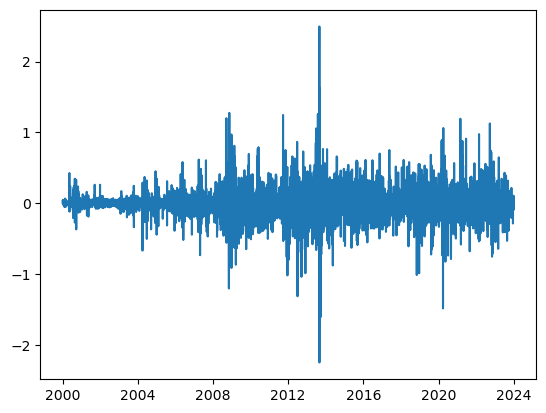

In [26]:
df_usd['diff'] = df_usd['USD'].diff().fillna(0)
check_stationarity(df_usd['diff'])
plt.plot(df_usd['diff'])
plt.show()

as diffrence series has Pvalue 0 it suggest high evidence to reject null hypothesis hance diffrence series is stationary

### ACF-PACF plot

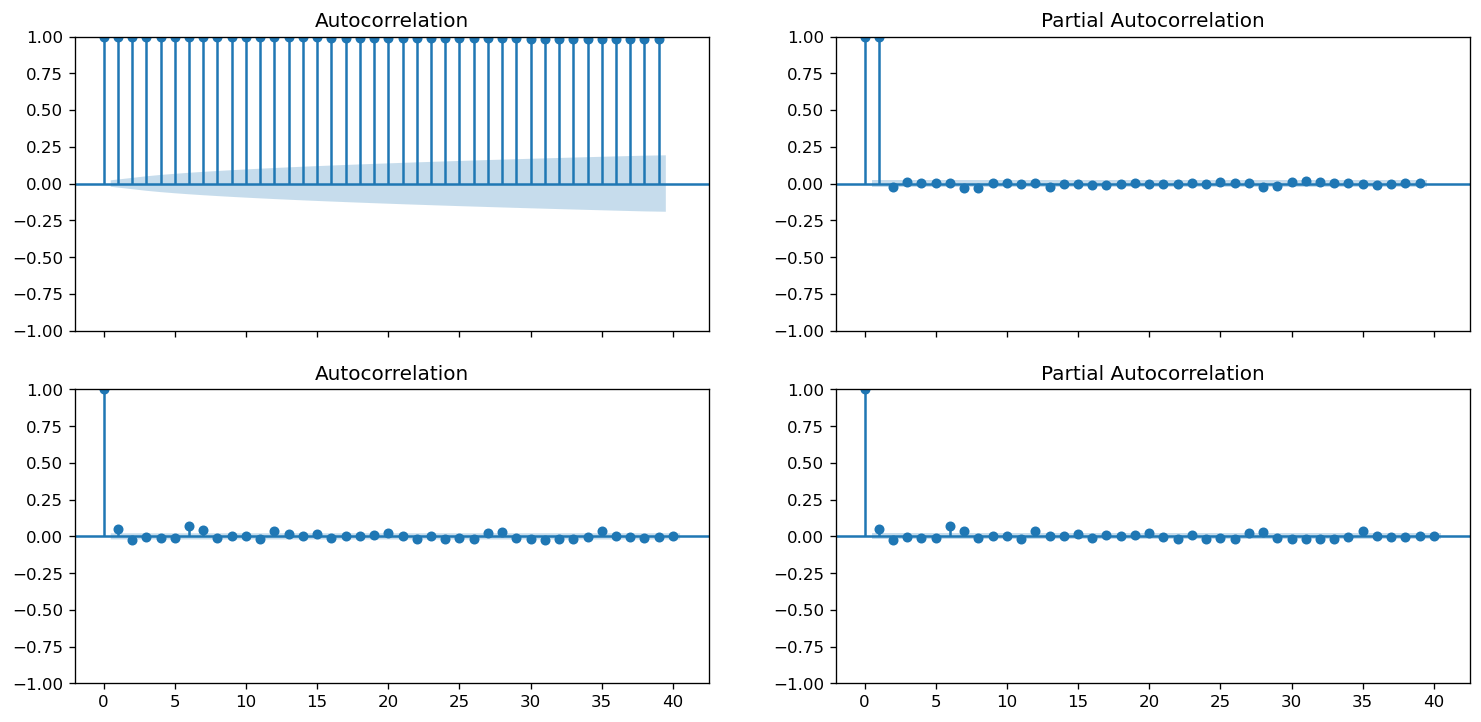

In [27]:
plt.rcParams.update({'figure.figsize':(15,7), 'figure.dpi':120})

fig, axes = plt.subplots(2, 2, sharex=True)
plot_acf(train_df['USD'], ax=axes[0, 0])
plot_pacf(train_df['USD'], ax = axes[0, 1])

plot_acf(df_usd['diff'], ax=axes[1, 0])
plot_pacf(df_usd['diff'], ax=axes[1, 1])
plt.show()

In [28]:
import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import acf, pacf

# Drop NA values and compute differenced series
usd_diff = train_df['USD'].diff().fillna(0)

# Compute ACF and PACF values
acf_values = acf(usd_diff, nlags=80)
pacf_values = pacf(usd_diff, nlags=80)

# Compute significance thresholds
n = len(usd_diff)
significance_level = 1.96 / np.sqrt(n)

# Create a DataFrame to display the values and thresholds
lags = np.arange(len(acf_values))
acf_pacf_df = pd.DataFrame({
    'Lag': lags,
    'ACF': acf_values,
    'PACF': pacf_values,
    'Significance Threshold': [significance_level] * len(acf_values)
})

# Filter the DataFrame to show only values greater than the threshold
significant_acf = acf_pacf_df[acf_pacf_df['ACF'].abs() > significance_level]
significant_pacf = acf_pacf_df[acf_pacf_df['PACF'].abs() > significance_level]

# Print the significant ACF and PACF values
print("Significant ACF values:")
print(significant_acf)

print("\nSignificant PACF values:")
print(significant_pacf)


Significant ACF values:
    Lag       ACF      PACF  Significance Threshold
0     0  1.000000  1.000000                0.022073
1     1  0.051078  0.051084                0.022073
2     2 -0.033463 -0.036176                0.022073
6     6  0.075254  0.075528                0.022073
7     7  0.043024  0.034678                0.022073
12   12  0.042360  0.039814                0.022073
27   27  0.028086  0.024768                0.022073
28   28  0.038677  0.038829                0.022073
31   31 -0.025884 -0.020971                0.022073
35   35  0.043713  0.040563                0.022073
41   41  0.027973  0.022881                0.022073
56   56  0.045202  0.042230                0.022073
69   69  0.035493  0.032555                0.022073
72   72 -0.030332 -0.027684                0.022073

Significant PACF values:
    Lag       ACF      PACF  Significance Threshold
0     0  1.000000  1.000000                0.022073
1     1  0.051078  0.051084                0.022073
2     2 -0.033

here i printed significant lags in range of 80 lags to have idea of values of autocorrelation

# Model 1: AR 

In [77]:
df_usd['diff'] = df_usd['USD'].diff().dropna()

In [79]:
# Splitting the data
train_size = int(len(df_usd) * 0.9)
train_df, test_df = df_usd.iloc[:train_size], df_usd.iloc[train_size:]

# Removing NaN values from differencing
train_diff = train_df['diff'].dropna()
test_diff = test_df['diff'].dropna()


In [95]:
from statsmodels.tsa.ar_model import AutoReg
selected_lags = [1, 2, 6, 7, 12]
# Fit the AR model
model = AutoReg(train_diff, lags=selected_lags)  # You can change the lags based on your analysis
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())


                            AutoReg Model Results                             
Dep. Variable:                   diff   No. Observations:                 7884
Model:             Restr. AutoReg(12)   Log Likelihood                2452.150
Method:               Conditional MLE   S.D. of innovations              0.177
Date:                Mon, 12 Aug 2024   AIC                          -4890.300
Time:                        16:16:17   BIC                          -4841.503
Sample:                    01-16-2000   HQIC                         -4873.584
                         - 08-04-2021                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0033      0.002      1.632      0.103      -0.001       0.007
diff.L1        0.0516      0.011      4.582      0.000       0.030       0.074
diff.L2       -0.0348      0.011     -3.099      0.0

In [97]:
# Forecasting the differenced series
forecast_diff = model_fit.predict(start=len(train_diff), end=len(train_diff) + len(test_diff) - 1, dynamic=False)

# Convert the differenced forecast back to the original scale
def invert_differencing(original_series, diff_series):
    inverted_series = original_series.iloc[-1] + diff_series.cumsum()
    return inverted_series

# Invert the differenced forecast
forecast = invert_differencing(train_df['USD'], forecast_diff)

# Combine actual and forecasted values
result = pd.concat([test_df['USD'], forecast], axis=1)
result.columns = ['Actual', 'Forecast']

print(result)



            Actual   Forecast
2021-08-05  74.100  74.174689
2021-08-06  74.242  74.183163
2021-08-07  74.324  74.186185
2021-08-08  74.406  74.196026
2021-08-09  74.488  74.192272
...            ...        ...
2023-12-25  83.164  77.537345
2023-12-26  83.158  77.541235
2023-12-27  83.263  77.545126
2023-12-28  83.169  77.549016
2023-12-29  83.186  77.552906

[877 rows x 2 columns]


In [99]:
def forecast_original_series(train_diff, original_train_series, test_diff_length, selected_lags):
    # Fit the AR model with the specified lags
    model = AutoReg(train_diff, lags=selected_lags)
    model_fit = model.fit()
    
    # Forecast the differenced series
    forecast_diff = model_fit.predict(start=len(train_diff), end=len(train_diff) + test_diff_length - 1, dynamic=False)
    
    # Convert the differenced forecast back to the original scale
    forecast = invert_differencing(original_train_series, forecast_diff)
    
    return forecast

# Using the function to forecast
predicted_series = forecast_original_series(train_diff, train_df['USD'], len(test_diff), selected_lags)

# Combine actual and predicted values
result = pd.concat([test_df['USD'], predicted_series], axis=1)
result.columns = ['Actual', 'Forecast']

print(result)


            Actual   Forecast
2021-08-05  74.100  74.174689
2021-08-06  74.242  74.183163
2021-08-07  74.324  74.186185
2021-08-08  74.406  74.196026
2021-08-09  74.488  74.192272
...            ...        ...
2023-12-25  83.164  77.537345
2023-12-26  83.158  77.541235
2023-12-27  83.263  77.545126
2023-12-28  83.169  77.549016
2023-12-29  83.186  77.552906

[877 rows x 2 columns]


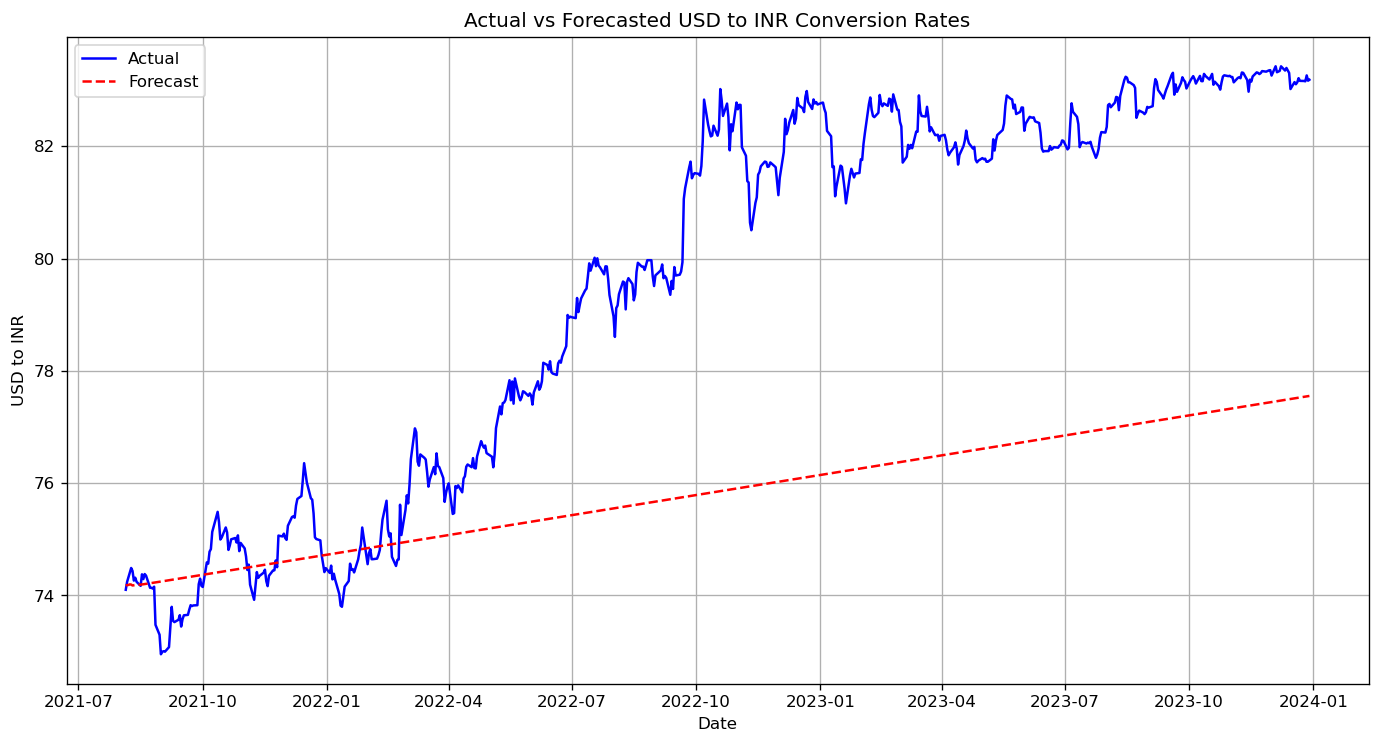

In [103]:
import matplotlib.pyplot as plt

# Assuming 'result' DataFrame is already created with 'Actual' and 'Forecast' columns
plt.figure(figsize=(14, 7))

plt.plot(result.index, result['Actual'], label='Actual', color='blue')
plt.plot(result.index, result['Forecast'], label='Forecast', color='red', linestyle='--')

plt.title('Actual vs Forecasted USD to INR Conversion Rates')
plt.xlabel('Date')
plt.ylabel('USD to INR')
plt.legend()
plt.grid(True)
plt.show()


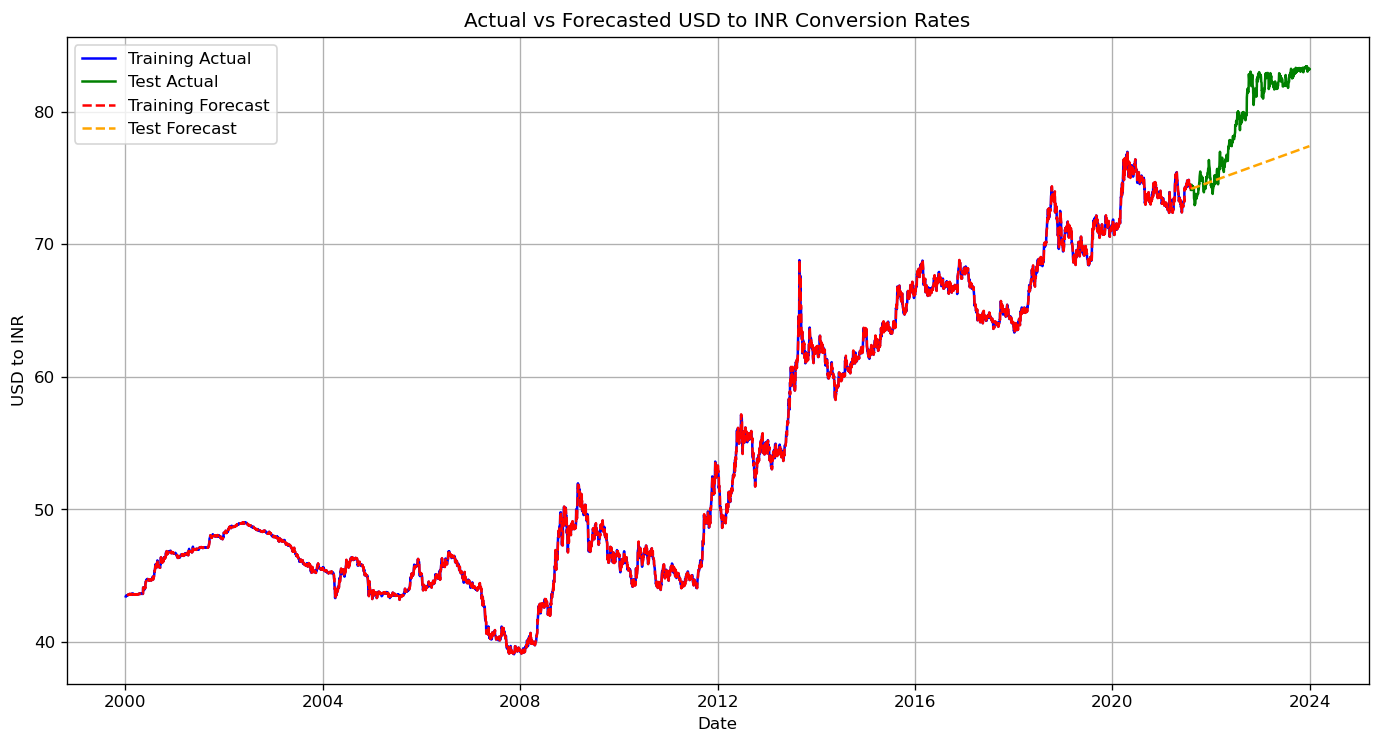

In [119]:
# Forecast the training period starting from the 13th data point
start_index = 12  # Forecasting starts from the 13th data point (0-based index)
forecast_length = len(train_df) - start_index

forecast_train = model_fit.predict(start=start_index, end=len(train_df) - 1, dynamic=False)

# Combine forecast with actual training data for plotting
forecast_train_series = pd.Series(forecast_train, index=train_df.index[start_index:])
train_forecast_combined = pd.concat([train_df['USD'], forecast_train_series], axis=1)
train_forecast_combined.columns = ['Actual', 'Forecast']

# Forecast the test data using the AR model
forecast_test = model_fit.predict(start=len(train_df), end=len(train_df) + len(test_df) - 1, dynamic=False)

# Convert the differenced forecast for test data back to the original scale
forecast_test_series = pd.Series(forecast_test, index=test_df.index)
combined_data = pd.concat([train_df['USD'], test_df['USD'], forecast_train_series, forecast_test_series], axis=1)
combined_data.columns = ['Train Actual', 'Test Actual', 'Train Forecast', 'Test Forecast']

# Plotting the actual and forecasted values
plt.figure(figsize=(14, 7))
plt.plot(combined_data.index, combined_data['Train Actual'], label='Training Actual', color='blue')
plt.plot(combined_data.index, combined_data['Test Actual'], label='Test Actual', color='green')
plt.plot(combined_data.index, combined_data['Train Forecast'], label='Training Forecast', color='red', linestyle='--')
plt.plot(combined_data.index, combined_data['Test Forecast'], label='Test Forecast', color='orange', linestyle='--')

plt.title('Actual vs Forecasted USD to INR Conversion Rates')
plt.xlabel('Date')
plt.ylabel('USD to INR')
plt.legend()
plt.grid(True)
plt.show()

In [101]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Calculate evaluation metrics
def evaluate_forecast(actual, forecast):
    mae = mean_absolute_error(actual, forecast)
    mse = mean_squared_error(actual, forecast)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((actual - forecast) / actual)) * 100
    mase = mae / np.mean(np.abs(np.diff(actual)))
    
    print(f'MAE: {mae}')
    print(f'MSE: {mse}')
    print(f'RMSE: {rmse}')
    print(f'MAPE: {mape}')
    print(f'MASE: {mase}')

# Evaluate the forecast
evaluate_forecast(result['Actual'], result['Forecast'])


MAE: 3.807727448183451
MSE: 20.049885638302527
RMSE: 4.477709865355562
MAPE: 4.667508107179263
MASE: 35.14158794547603


# Model 2: ARMA

In [29]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA

# Assume df_usd is already defined and preprocessed as in the previous steps
df_usd['diff'] = df_usd['USD'].diff().dropna()

# Splitting the data
train_size = int(len(df_usd) * 0.9)
train_df, test_df = df_usd.iloc[:train_size], df_usd.iloc[train_size:]

# Removing NaN values from differencing
train_diff = train_df['diff'].dropna()
test_diff = test_df['diff'].dropna()

# Fit the ARMA model with order (7,1,7)
model = ARIMA(train_diff, order=(7, 1, 7))
model_fit = model.fit()

# Print the model summary
print(model_fit.summary())


C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                   diff   No. Observations:                 7884
Model:                 ARIMA(7, 1, 7)   Log Likelihood                2448.834
Date:                Tue, 13 Aug 2024   AIC                          -4867.667
Time:                        10:55:05   BIC                          -4763.080
Sample:                    01-04-2000   HQIC                         -4831.843
                         - 08-04-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -2.0618      0.099    -20.738      0.000      -2.257      -1.867
ar.L2         -2.1731      0.144    -15.143      0.000      -2.454      -1.892
ar.L3         -1.9835      0.122    -16.259      0.0

In [34]:
# Forecasting
n_forecast = len(test_df)
forecast_diff = model_fit.forecast(steps=n_forecast)

# Invert the differencing to get the forecasted values in the original scale
last_train_value = train_df['USD'].iloc[-1]
forecast = np.cumsum(forecast_diff) + last_train_value


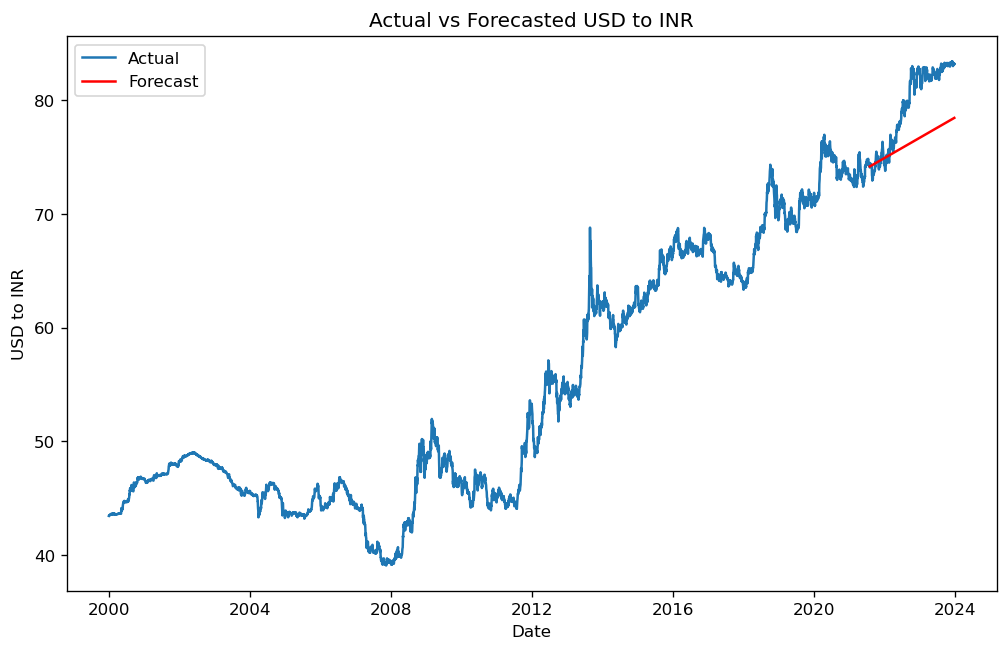

In [35]:
# Plotting the results
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(df_usd['USD'], label='Actual')
plt.plot(test_df.index, forecast, label='Forecast', color='red')
plt.title('Actual vs Forecasted USD to INR')
plt.xlabel('Date')
plt.ylabel('USD to INR')
plt.legend()
plt.show()

In [38]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
# Calculate performance metrics
mse = mean_squared_error(test_df['USD'], forecast)
mae = mean_absolute_error(test_df['USD'], forecast)

print("\nPerformance Metrics:")
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")



Performance Metrics:
Mean Squared Error: 15.720459027769216
Mean Absolute Error: 3.372533756780674


# Model 3: ARIMA

In [68]:
import pmdarima as pm
import pandas as pd


model_1 = pm.auto_arima(train_df['USD'], trace=True, suppress_warnings=True)

# Print the summary of the best-fit model
print(model_1.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-4845.441, Time=3.85 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-4822.388, Time=1.54 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-4840.982, Time=1.18 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-4842.511, Time=1.67 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-4820.613, Time=0.43 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-4847.595, Time=1.94 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-4849.209, Time=1.55 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-4847.562, Time=1.78 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-4846.454, Time=4.18 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-4845.461, Time=3.21 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-4847.563, Time=0.59 sec

Best model:  ARIMA(0,1,2)(0,0,0)[0] intercept
Total fit time: 21.939 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:      

acording to AIC score Best model is **ARIMA(0,1,2)(0,0,0)[0] intercept** 

In [71]:
test_df = test_df.sort_index()

In [75]:
import pandas as pd

# Generate forecasts for the required number of periods
forecast = model_1.predict(n_periods=len(test_df))

# Ensure the index for test_df is correctly set (assumed to be already in datetime format)
test_dates = test_df.index

# Create DataFrame for forecast results with the same index as test_df
forecast_df = pd.DataFrame({
    'Forecast': forecast
}, index=test_dates)

# Display the DataFrame
print(forecast_df.head())


             Forecast
2021-08-05  74.178638
2021-08-06  74.185020
2021-08-07  74.188919
2021-08-08  74.192817
2021-08-09  74.196715


In [77]:
forecast_df.head()

,Forecast
2021-08-05,74.178638
2021-08-06,74.185020
2021-08-07,74.188919
2021-08-08,74.192817
2021-08-09,74.196715


In [79]:
test_df.head()

,USD
2021-08-05,74.100
2021-08-06,74.242
2021-08-07,74.324
2021-08-08,74.406
2021-08-09,74.488


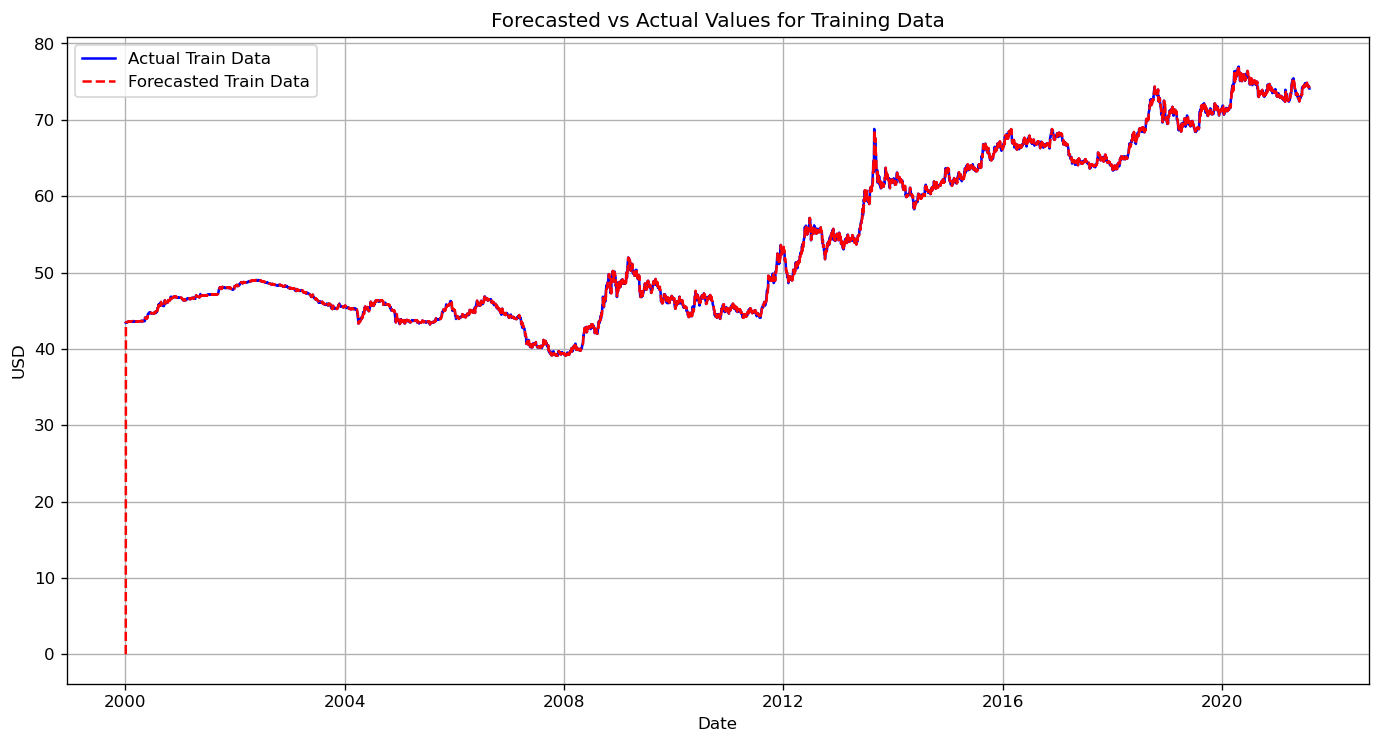

In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Forecast the entire training data period (including the forecasted values)
forecast_train = model_1.predict_in_sample()

# Create a DataFrame to hold forecast results
forecast_train_df = pd.DataFrame({
    'Forecast': forecast_train
}, index=train_df.index)

# Combine train_df and forecast_train_df for plotting
combined_train_df = pd.concat([train_df, forecast_train_df], axis=1)

# Plot results
plt.figure(figsize=(14, 7))

# Plot actual training data
plt.plot(train_df.index, train_df['USD'], label='Actual Train Data', color='blue')

# Plot forecasted values for training data
plt.plot(forecast_train_df.index, forecast_train_df['Forecast'], label='Forecasted Train Data', color='red', linestyle='--')

# Add titles and labels
plt.title('Forecasted vs Actual Values for Training Data')
plt.xlabel('Date')
plt.ylabel('USD')
plt.legend()
plt.grid(True)
plt.show()


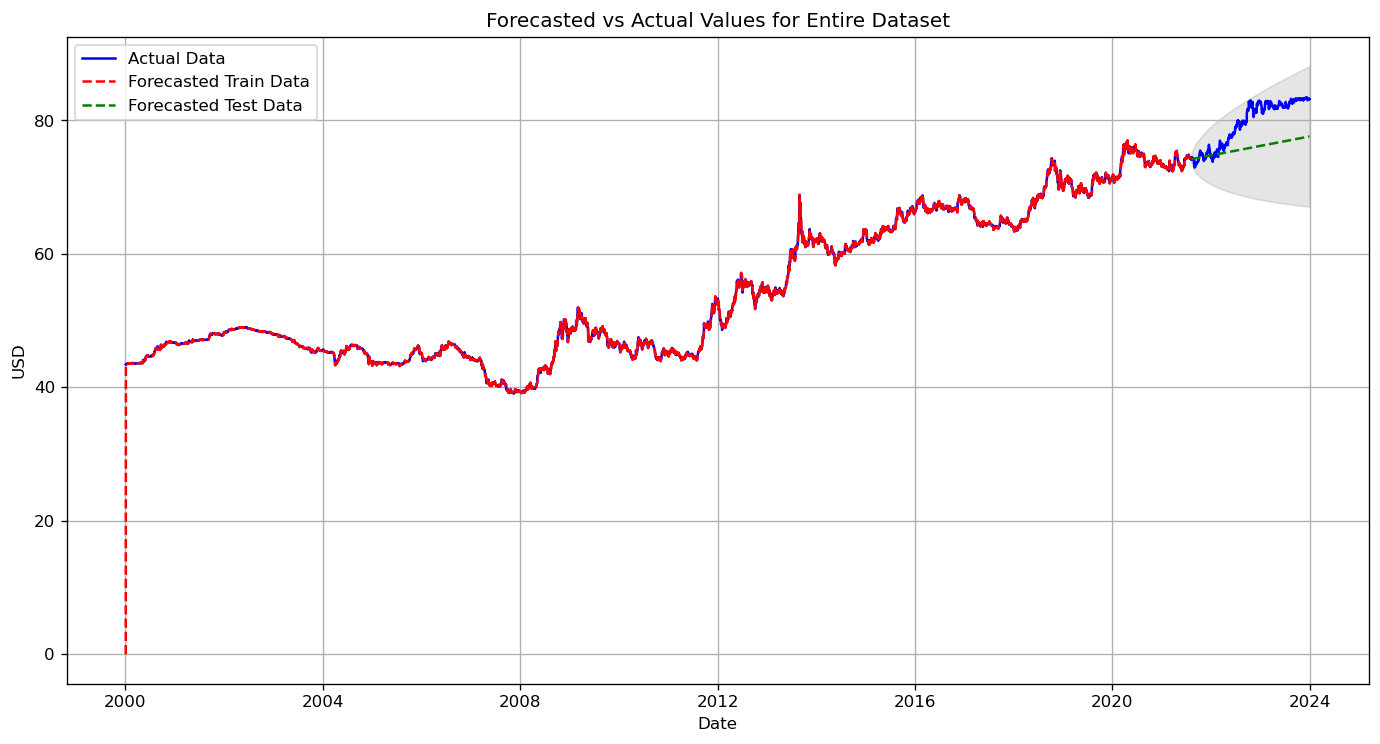

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Forecast the entire training data period (including the forecasted values)
forecast_train = model_1.predict_in_sample()

# Forecast the test data period
forecast_test, conf_int = model_1.predict(n_periods=len(test_df), return_conf_int=True)

# Create DataFrames to hold forecast results
forecast_train_df = pd.DataFrame({
    'Forecast': forecast_train
}, index=train_df.index)

forecast_test_df = pd.DataFrame({
    'Forecast': forecast_test
}, index=test_df.index)

# Combine train_df, test_df, forecast_train_df, and forecast_test_df for plotting
combined_df = pd.concat([train_df, test_df, forecast_train_df, forecast_test_df], axis=1)

# Plot results
plt.figure(figsize=(14, 7))

# Plot actual data
plt.plot(df_usd.index, df_usd['USD'], label='Actual Data', color='blue')

# Plot forecasted values for training data
plt.plot(forecast_train_df.index, forecast_train_df['Forecast'], label='Forecasted Train Data', color='red', linestyle='--')

# Plot forecasted values for test data
plt.plot(forecast_test_df.index, forecast_test_df['Forecast'], label='Forecasted Test Data', color='green', linestyle='--')

# Add confidence intervals for test data forecast
plt.fill_between(test_df.index, conf_int[:, 0], conf_int[:, 1], color='k', alpha=0.1)

# Add titles and labels
plt.title('Forecasted vs Actual Values for Entire Dataset')
plt.xlabel('Date')
plt.ylabel('USD')
plt.legend()
plt.grid(True)
plt.show()


In [91]:
# Calculate Error Metrics
from sklearn.metrics import mean_squared_error
import numpy as np

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test_df['USD'], forecast))
print(f"RMSE: {rmse}")

# Optional: Calculate additional metrics like MAE
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(test_df['USD'], forecast)
print(f"MAE: {mae}")

RMSE: 4.444062709444836
MAE: 3.7777460697458


# Model 4: SARIMA

### Seasonal Decomposition

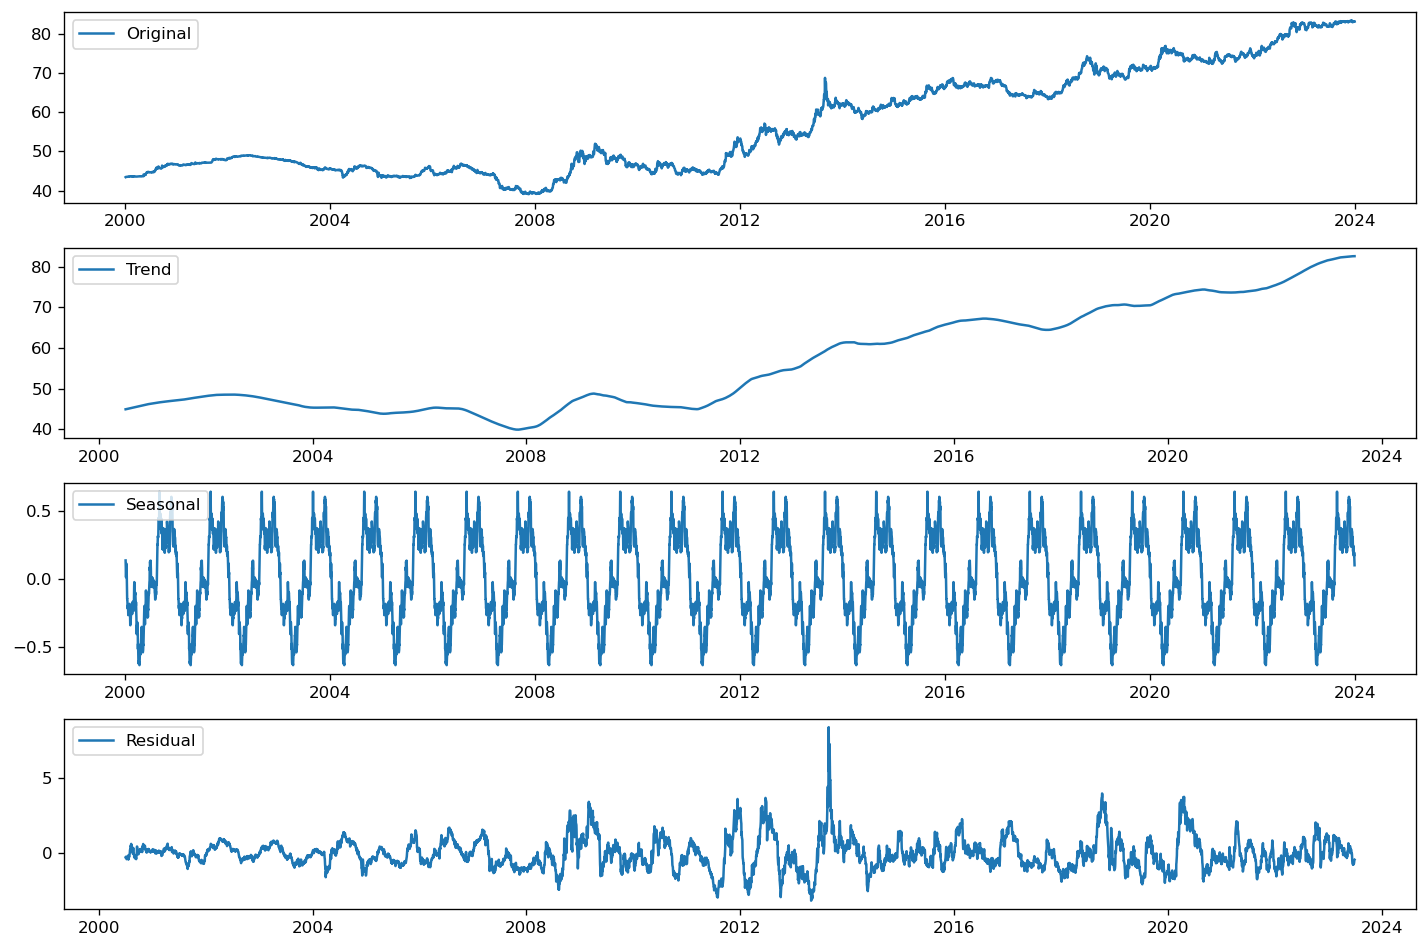

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming df_usd is your dataframe with 'Date' as index and 'USD' as the column
# df_usd = pd.read_csv('your_data.csv', index_col='Date', parse_dates=True)

# Seasonal decomposition
decomposition = seasonal_decompose(df_usd['USD'], model='additive', period=365)  # Adjust period based on your data

# Plot the decomposition
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(df_usd['USD'], label='Original')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(decomposition.resid, label='Residual')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


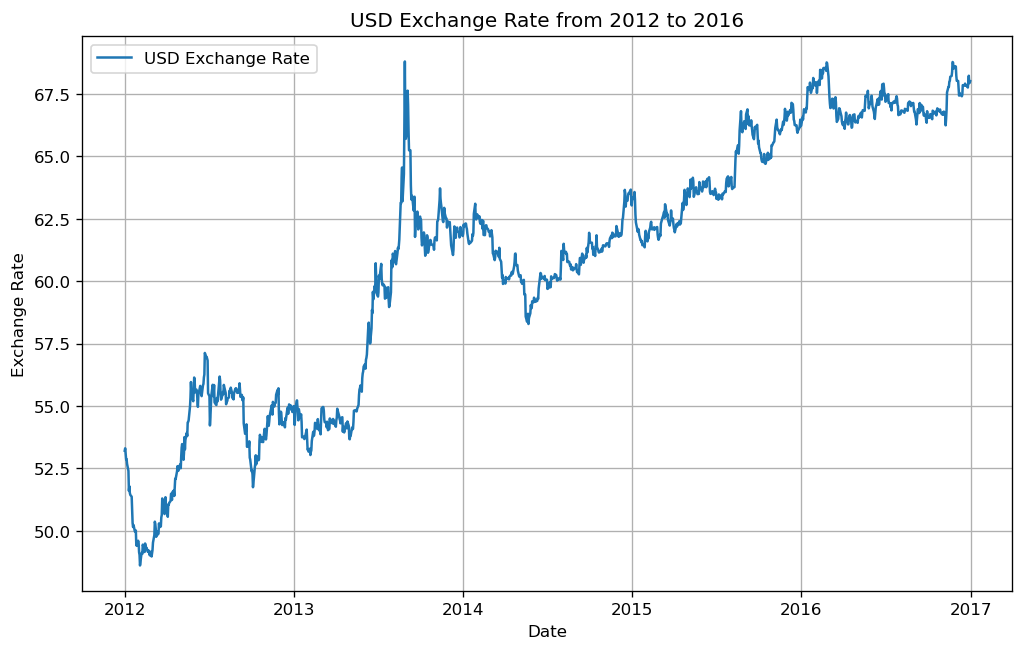

In [44]:
# Filter the DataFrame for the date range between 2012 and 2016
df_filtered = df_usd.loc['2012-01-01':'2016-12-31']

# Plotting the filtered data
plt.figure(figsize=(10, 6))
plt.plot(df_filtered.index, df_filtered['USD'], label='USD Exchange Rate')
plt.title('USD Exchange Rate from 2012 to 2016')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.grid(True)
plt.show()

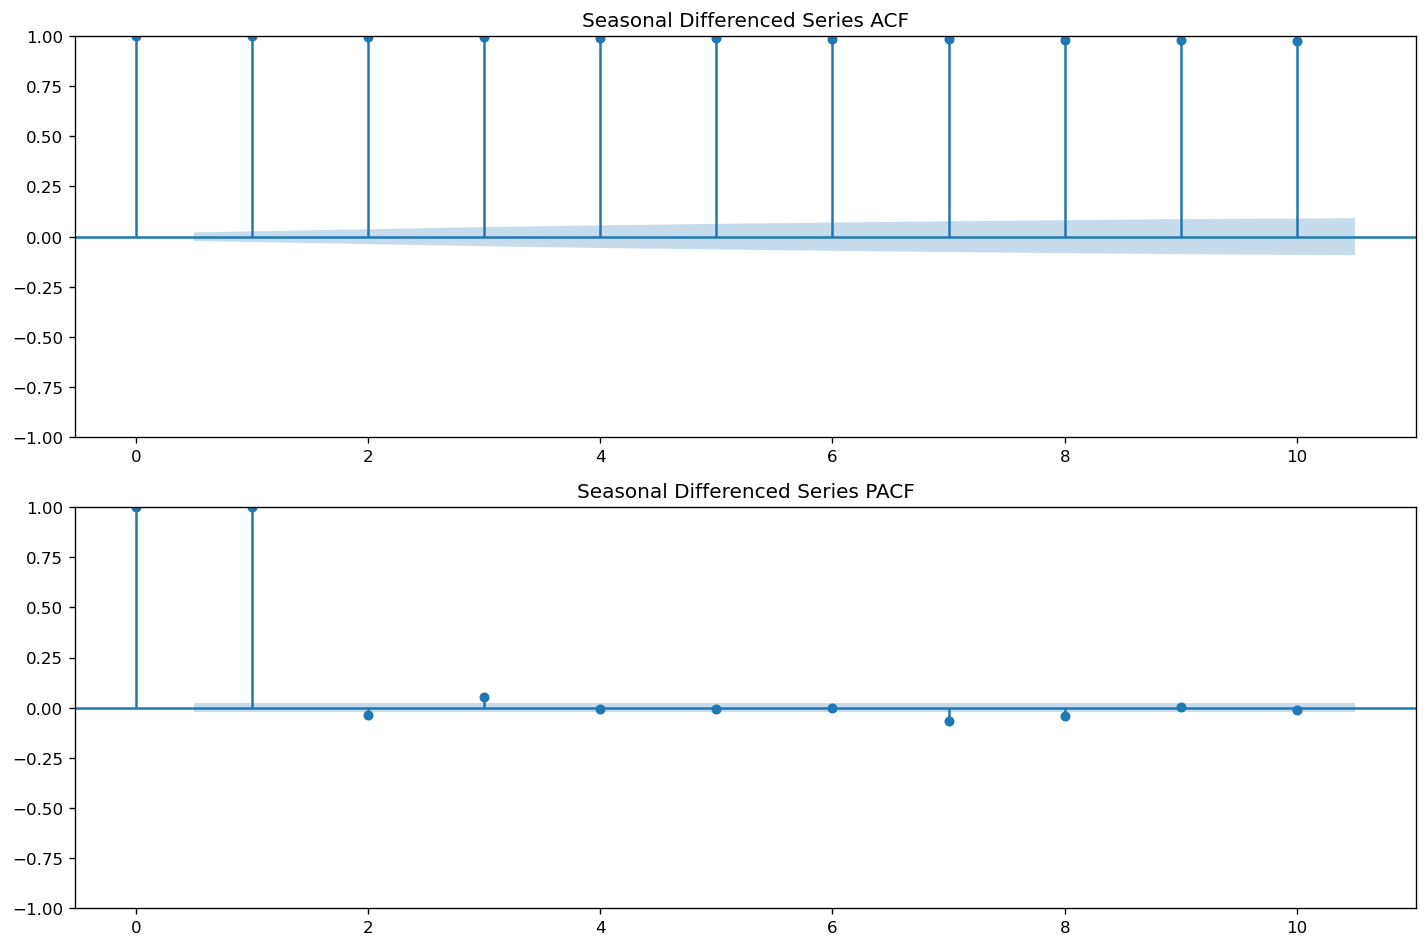

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm

# Assuming df_usd is your DataFrame with 'Date' as the index and 'USD' as the column
# df_usd = pd.read_csv('your_data.csv', index_col='Date', parse_dates=True)

# Perform seasonal differencing (assuming monthly data with yearly seasonality)
seasonal_lag = 365
df_usd['seasonal_diff'] = df_usd['USD'].diff(seasonal_lag).dropna()

# Plot ACF and PACF for the seasonally differenced series
fig, axes = plt.subplots(2, 1, figsize=(12, 8))

plot_acf(df_usd['seasonal_diff'].dropna(), lags=10, ax=axes[0])
axes[0].set_title('Seasonal Differenced Series ACF')

plot_pacf(df_usd['seasonal_diff'].dropna(), lags=10, ax=axes[1])
axes[1].set_title('Seasonal Differenced Series PACF')

plt.tight_layout()
plt.show()


### Building SARIMA model

In [101]:
import statsmodels.api as sm
ar_lags = [1, 2, 6,]  
ma_lags = [1, 2, 6, 12] 

model_2 = sm.tsa.SARIMAX(train_df["USD"], order=(len(ar_lags), 1, len(ma_lags)),
                       trend='c', enforce_stationarity=False, enforce_invertibility=False)
model_2 = model_2.fit()
print(model_2.summary())

C:\Users\Gaurav\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                    USD   No. Observations:                 7885
Model:               SARIMAX(3, 1, 4)   Log Likelihood                2436.528
Date:                Thu, 25 Jul 2024   AIC                          -4855.056
Time:                        12:39:46   BIC                          -4792.308
Sample:                    01-03-2000   HQIC                         -4833.562
                         - 08-04-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0048      0.003      1.829      0.067      -0.000       0.010
ar.L1          0.5544      0.169      3.283      0.001       0.223       0.885
ar.L2         -0.6260      0.152     -4.129      0.0

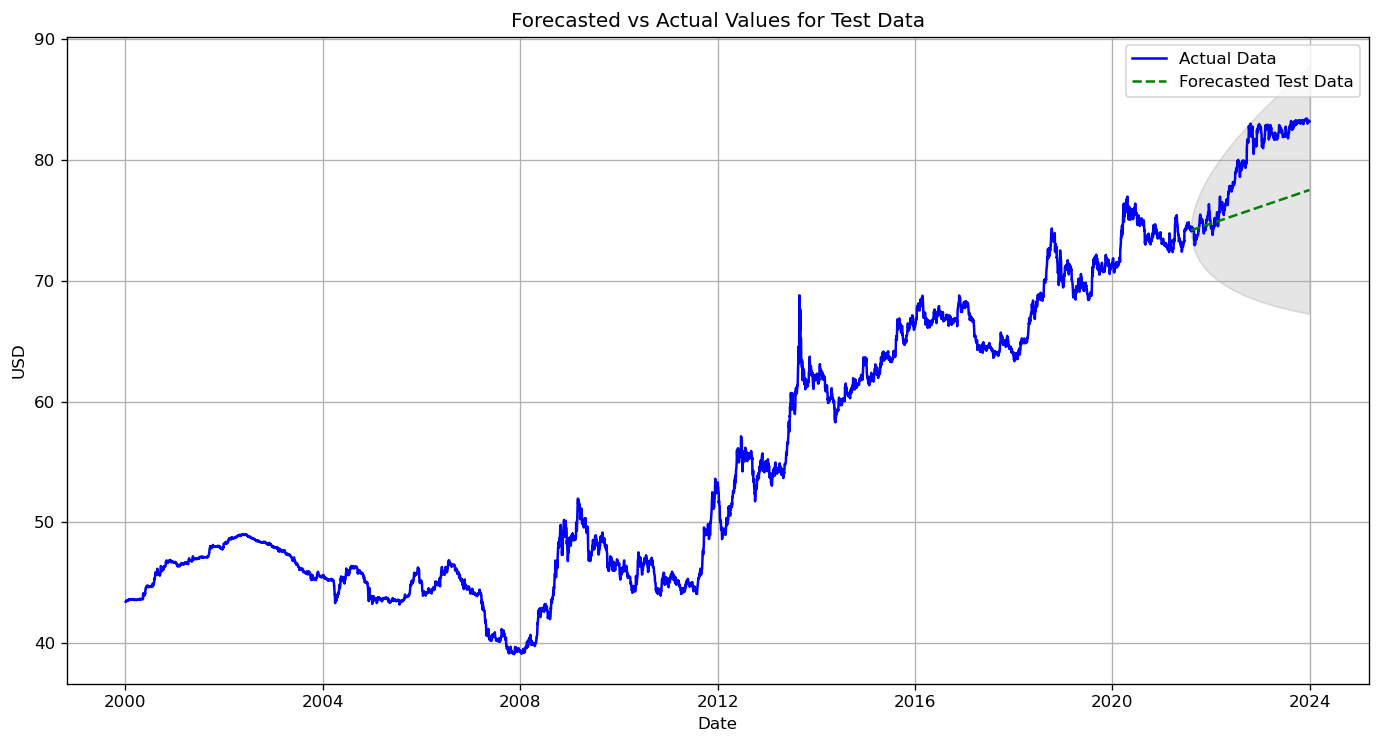

In [109]:
forecast_2 = model_2.get_forecast(steps=len(test_df))

# Get the predicted mean and confidence intervals
forecast_2_mean = forecast_2.predicted_mean
forecast_2_conf_int = forecast_2.conf_int()

# Create DataFrames for forecast results
forecast_2_df = pd.DataFrame({
    'Forecast': forecast_2_mean
}, index=test_df.index)

# Combine train_df, test_df, and forecast_2_df for plotting
combined_df = pd.concat([train_df, test_df, forecast_2_df], axis=1)

# Plot results
plt.figure(figsize=(14, 7))

# Plot actual data
plt.plot(df_usd.index, df_usd['USD'], label='Actual Data', color='blue')

# Plot forecasted values for test data
plt.plot(forecast_2_df.index, forecast_2_df['Forecast'], label='Forecasted Test Data', color='green', linestyle='--')

# Add confidence intervals for test data forecast
plt.fill_between(test_df.index, forecast_2_conf_int.iloc[:, 0], forecast_2_conf_int.iloc[:, 1], color='k', alpha=0.1)

# Add titles and labels
plt.title('Forecasted vs Actual Values for Test Data')
plt.xlabel('Date')
plt.ylabel('USD')
plt.legend()
plt.grid(True)
plt.show()


In [111]:
rmse = np.sqrt(mean_squared_error(test_df['USD'], forecast_2_mean))
mae = mean_absolute_error(test_df['USD'], forecast_2_mean)

print(f'RMSE: {rmse}')
print(f'MAE: {mae}')

RMSE: 4.4839405083617745
MAE: 3.8113697105849975


# Model 5: fbprophet

In [71]:
!pip install prophet

In [76]:
# Create a new DataFrame with 'ds' and 'y' columns
df_fbp = df_usd[['USD']].reset_index()
df_fbp.columns = ['ds', 'y']

In [77]:
df_fbp.head()

,ds,y
0,2000-01-03,43.435
1,2000-01-04,43.480
2,2000-01-05,43.490
3,2000-01-06,43.490
4,2000-01-07,43.485


In [93]:
from prophet import Prophet

param_grid = {
    'changepoint_prior_scale': [0.001, 0.01, 0.1],
    'seasonality_prior_scale': [0.01, 0.1, 1],
}
best_params = {}
best_score = float('inf')  # Initialize with a large value

for changepoint_prior_scale in param_grid['changepoint_prior_scale']:
    for seasonality_prior_scale in param_grid['seasonality_prior_scale']:
        model = Prophet(changepoint_prior_scale=changepoint_prior_scale,
                        seasonality_prior_scale=seasonality_prior_scale)
        model.fit(train)

        # Evaluate the model (e.g., calculate RMSE)
        mse = mean_squared_error(test['y'], forecast['yhat'])  # Replace with your chosen metric

        if mse < best_score:  # Check if current model is better
            best_params = {'changepoint_prior_scale': changepoint_prior_scale,
                           'seasonality_prior_scale': seasonality_prior_scale}
            best_score = mse

print("Best Hyperparameters:", best_params)
print("Best Model Score:", best_score)


14:15:13 - cmdstanpy - INFO - Chain [1] start processing
14:15:15 - cmdstanpy - INFO - Chain [1] done processing
14:15:16 - cmdstanpy - INFO - Chain [1] start processing
14:15:18 - cmdstanpy - INFO - Chain [1] done processing
14:15:20 - cmdstanpy - INFO - Chain [1] start processing
14:15:21 - cmdstanpy - INFO - Chain [1] done processing
14:15:23 - cmdstanpy - INFO - Chain [1] start processing
14:15:28 - cmdstanpy - INFO - Chain [1] done processing
14:15:30 - cmdstanpy - INFO - Chain [1] start processing
14:15:35 - cmdstanpy - INFO - Chain [1] done processing
14:15:36 - cmdstanpy - INFO - Chain [1] start processing
14:15:43 - cmdstanpy - INFO - Chain [1] done processing
14:15:44 - cmdstanpy - INFO - Chain [1] start processing
14:15:51 - cmdstanpy - INFO - Chain [1] done processing
14:15:52 - cmdstanpy - INFO - Chain [1] start processing
14:15:59 - cmdstanpy - INFO - Chain [1] done processing
14:16:00 - cmdstanpy - INFO - Chain [1] start processing
14:16:05 - cmdstanpy - INFO - Chain [1]

Best Hyperparameters: {'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 0.01}
Best Model Score: 3.8160979683309924


In [94]:
from prophet import Prophet

# Create the Prophet model with optimal hyperparameters
model = Prophet(
    changepoint_prior_scale=0.001,
    seasonality_prior_scale=0.01
)

# Fit the model to your training data
model.fit(train_data)

14:18:20 - cmdstanpy - INFO - Chain [1] start processing
14:18:22 - cmdstanpy - INFO - Chain [1] done processing


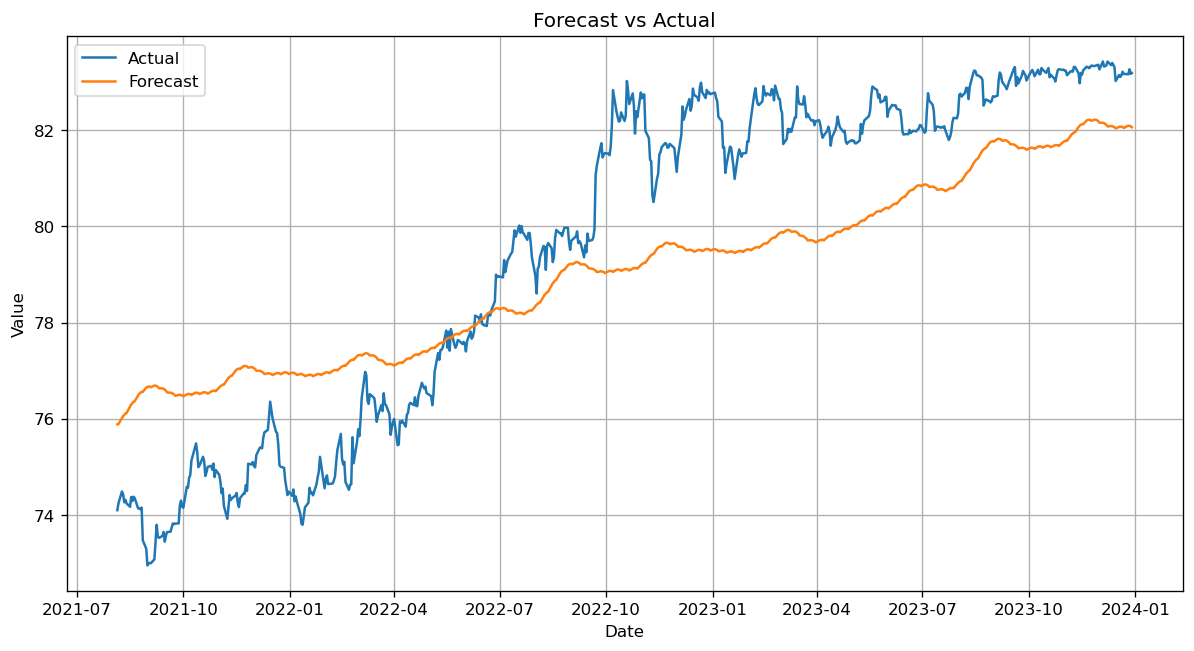

In [96]:
plt.figure(figsize=(12, 6))
plt.plot(test['ds'], test['y'], label='Actual')
plt.plot(test['ds'], forecast['yhat'], label='Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Forecast vs Actual')
plt.legend()
plt.grid(True)
plt.show()

In [95]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Assuming 'test' DataFrame has 'ds', 'y', and 'yhat' columns

# Calculate MAE, MSE, and RMSE
mae = mean_absolute_error(test['y'], forecast['yhat'])
mse = mean_squared_error(test['y'], forecast['yhat'])
rmse = np.sqrt(mse)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)

MAE: 1.7521140455467872
MSE: 3.8160979683309924
RMSE: 1.9534835469824137


# Deep learning Based Approch.

In [25]:
df_usd.head()

,USD
2000-01-03,43.435
2000-01-04,43.480
2000-01-05,43.490
2000-01-06,43.490
2000-01-07,43.485


In [27]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Load the data (assuming df_usd is your DataFrame)
# df_usd = pd.read_csv('your_data.csv', index_col='Date', parse_dates=True)

# Ensure the data is sorted by date
df_usd = df_usd.sort_index()

# Normalize the data
scaler = MinMaxScaler()
df_usd_scaled = scaler.fit_transform(df_usd[['USD']])

# Convert the scaled data back to a DataFrame for convenience
df_usd_scaled = pd.DataFrame(df_usd_scaled, index=df_usd.index, columns=['USD'])

# Train-test split
train_size = int(len(df_usd_scaled) * 0.9)
train_df = df_usd_scaled.iloc[:train_size]
test_df = df_usd_scaled.iloc[train_size:]


In [28]:
def create_sequences(data, sequence_length):
    sequences = []
    targets = []
    for i in range(len(data) - sequence_length):
        seq = data[i:i + sequence_length]
        target = data[i + sequence_length]
        sequences.append(seq)
        targets.append(target)
    return np.array(sequences), np.array(targets)

sequence_length = 180 

X_train, y_train = create_sequences(train_df['USD'].values, sequence_length)
X_test, y_test = create_sequences(test_df['USD'].values, sequence_length)


In [29]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN

model = Sequential()
model.add(SimpleRNN(50, activation='relu', input_shape=(sequence_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [30]:
# Reshape data for RNN input
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
193/193 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step - loss: 0.0103 - val_loss: 4.0485e-05
Epoch 2/50
193/193 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 3.3495e-05 - val_loss: 5.8869e-05
Epoch 3/50
193/193 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 3.3810e-05 - val_loss: 4.0133e-05
Epoch 4/50
193/193 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 3.2567e-05 - val_loss: 4.0025e-05
Epoch 5/50
193/193 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 2.9028e-05 - val_loss: 3.7803e-05
Epoch 6/50
193/193 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 3.1552e-05 - val_loss: 5.6798e-05
Epoch 7/50
193/193 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 3.1111e-05 - val_loss: 3.4952e-05
Epoch 8/50
193/193 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 2.7788e-05 - val_loss: 2.9104e-05
Epoch 9/50
193/193 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 2.3488e-05 - val_loss: 3.2663e-05
Epoch 10/50
193/193 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 2.4318e-05 - val_loss: 5.2012e-05
Epoch 11/50
193/193 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step

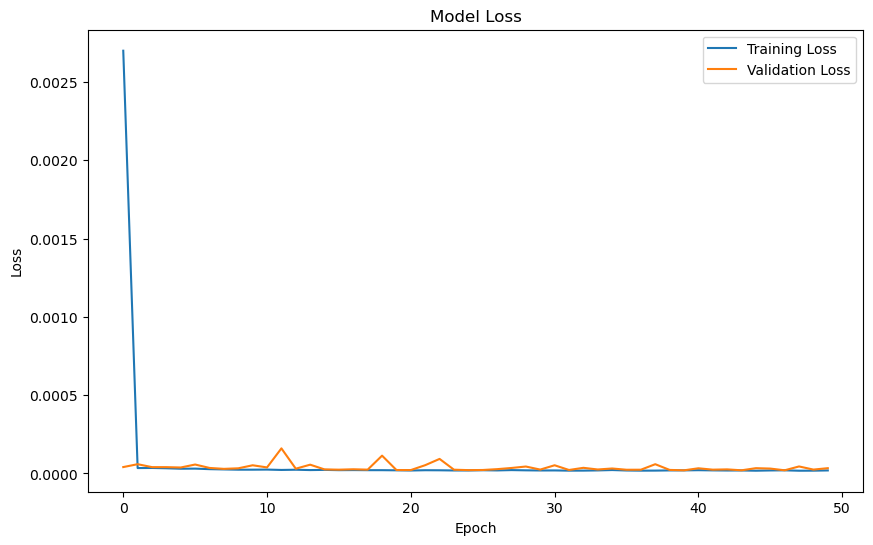

In [34]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [31]:
# Make predictions
y_pred = model.predict(X_test)

# Inverse scale the predictions and actual values
y_pred_rescaled = scaler.inverse_transform(y_pred)
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))

# Create a DataFrame for comparison
results = pd.DataFrame({'Actual': y_test_rescaled.flatten(), 'Predicted': y_pred_rescaled.flatten()}, index=df_usd.index[train_size + sequence_length:])

22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step


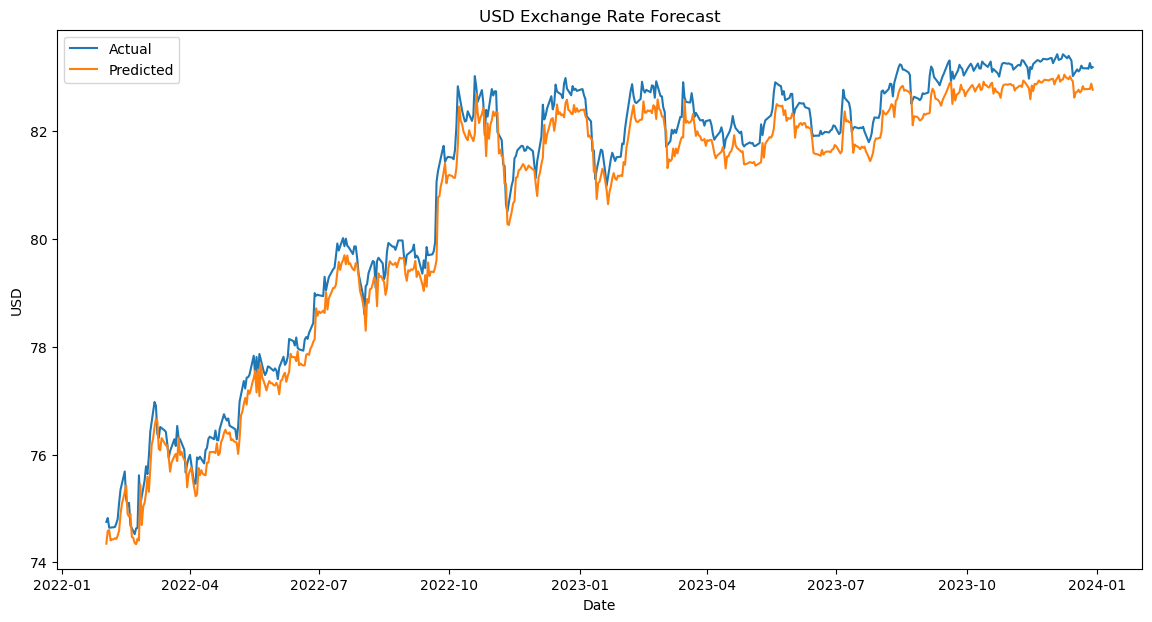

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
plt.plot(results['Actual'], label='Actual')
plt.plot(results['Predicted'], label='Predicted')
plt.title('USD Exchange Rate Forecast')
plt.xlabel('Date')
plt.ylabel('USD')
plt.legend()
plt.show()

In [33]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

rmse = np.sqrt(mean_squared_error(results['Actual'], results['Predicted']))
mae = mean_absolute_error(results['Actual'], results['Predicted'])

print(f'RMSE: {rmse}')
print(f'MAE: {mae}')


RMSE: 0.39548468573200274
MAE: 0.3638740500582856


# Model : LSTM

In [35]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt

data = df_usd['USD'].values.reshape(-1, 1)

In [36]:
# Normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Split the data into training and testing sets
train_size = int(len(scaled_data) * 0.9)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]


In [37]:
# Create sequences for training and testing
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(sequence_length, len(data)):
        X.append(data[i-sequence_length:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

sequence_length = 180
X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)

# Reshape the data for LSTM input
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))


In [40]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(sequence_length, 1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Early stopping and model checkpoint
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_lstm_model.keras', monitor='val_loss', save_best_only=True)

In [41]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1,
                    callbacks=[early_stopping, model_checkpoint])


Epoch 1/100
217/217 ━━━━━━━━━━━━━━━━━━━━ 31s 125ms/step - loss: 0.0146 - val_loss: 1.7683e-04
Epoch 2/100
217/217 ━━━━━━━━━━━━━━━━━━━━ 27s 125ms/step - loss: 1.2733e-04 - val_loss: 2.0615e-04
Epoch 3/100
217/217 ━━━━━━━━━━━━━━━━━━━━ 26s 121ms/step - loss: 1.1886e-04 - val_loss: 1.4998e-04
Epoch 4/100
217/217 ━━━━━━━━━━━━━━━━━━━━ 27s 122ms/step - loss: 1.1492e-04 - val_loss: 2.5447e-04
Epoch 5/100
217/217 ━━━━━━━━━━━━━━━━━━━━ 27s 126ms/step - loss: 1.2157e-04 - val_loss: 3.8826e-04
Epoch 6/100
217/217 ━━━━━━━━━━━━━━━━━━━━ 27s 123ms/step - loss: 9.6750e-05 - val_loss: 8.9877e-05
Epoch 7/100
217/217 ━━━━━━━━━━━━━━━━━━━━ 27s 126ms/step - loss: 8.0713e-05 - val_loss: 9.0337e-05
Epoch 8/100
217/217 ━━━━━━━━━━━━━━━━━━━━ 29s 131ms/step - loss: 7.8200e-05 - val_loss: 1.5937e-04
Epoch 9/100
217/217 ━━━━━━━━━━━━━━━━━━━━ 27s 124ms/step - loss: 8.2847e-05 - val_loss: 6.8131e-05
Epoch 10/100
217/217 ━━━━━━━━━━━━━━━━━━━━ 26s 120ms/step - loss: 7.4632e-05 - val_loss: 7.5874e-05
Epoch 11/100
217/217 ━━

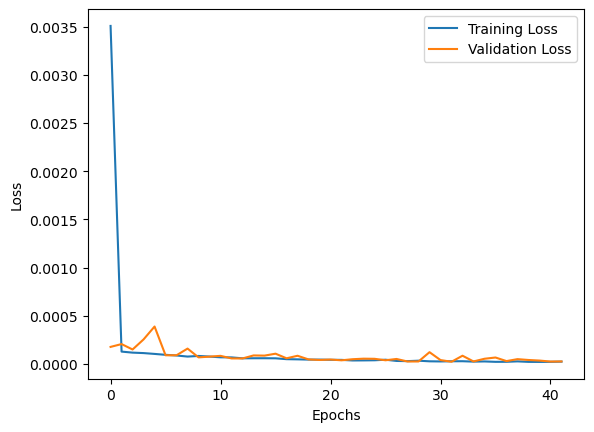

In [42]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [43]:
# Make predictions on the test data
predicted_values = model.predict(X_test)

# Invert scaling for predictions
predicted_values = scaler.inverse_transform(predicted_values.reshape(-1, 1))
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))


22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step


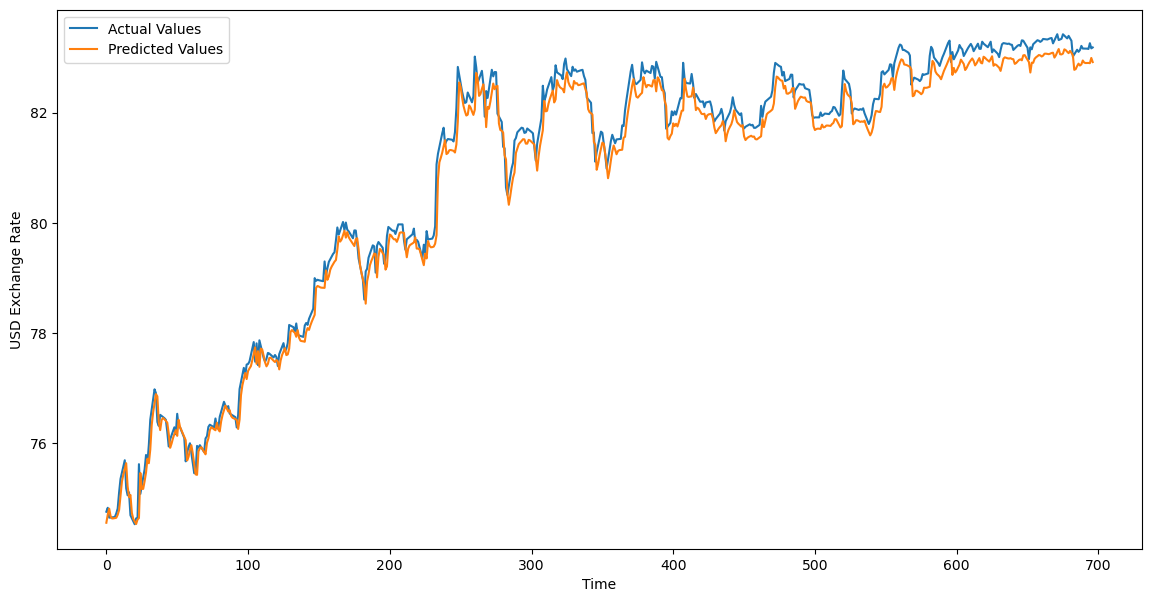

In [45]:
# Plot the actual and predicted values
plt.figure(figsize=(14, 7))
plt.plot(y_test_scaled, label='Actual Values')
plt.plot(predicted_values, label='Predicted Values')
plt.xlabel('Time')
plt.ylabel('USD Exchange Rate')
plt.legend()
plt.show()


269/269 ━━━━━━━━━━━━━━━━━━━━ 10s 39ms/step


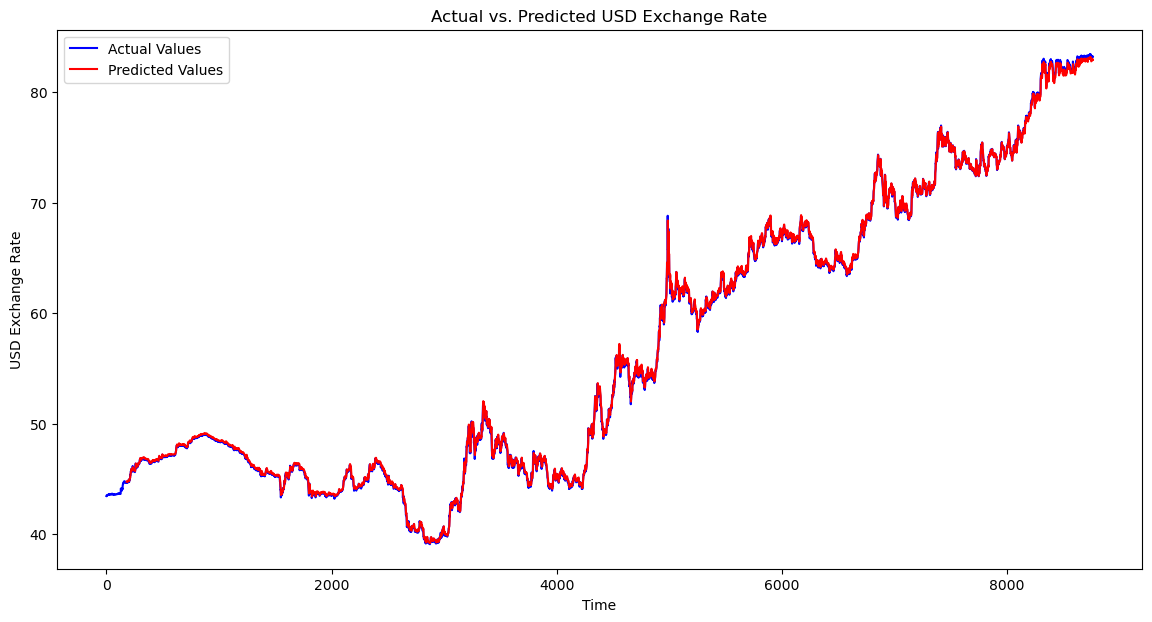

In [50]:
# Make predictions on the entire dataset
def make_predictions(model, data, sequence_length):
    X, _ = create_sequences(data, sequence_length)
    X = X.reshape((X.shape[0], X.shape[1], 1))
    predictions = model.predict(X)
    return predictions

# Get predictions for the entire dataset
full_data_predictions = make_predictions(model, scaled_data, sequence_length)

# Invert scaling for predictions and actual values
full_data_predictions = scaler.inverse_transform(full_data_predictions.reshape(-1, 1))

# Combine training and testing predictions
full_data_actual = scaler.inverse_transform(scaled_data)

# Plot the actual and predicted values for the entire dataset
plt.figure(figsize=(14, 7))
plt.plot(full_data_actual, label='Actual Values', color='blue')
plt.plot(np.arange(sequence_length, len(full_data_predictions) + sequence_length), full_data_predictions, label='Predicted Values', color='red')
plt.xlabel('Time')
plt.ylabel('USD Exchange Rate')
plt.legend()
plt.title('Actual vs. Predicted USD Exchange Rate')
plt.show()


In [46]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test_scaled, predicted_values))
print(f'Root Mean Squared Error: {rmse}')

# Calculate MAE
mae = mean_absolute_error(y_test_scaled, predicted_values)
print(f'Mean Absolute Error: {mae}')


Root Mean Squared Error: 0.26921612137679707
Mean Absolute Error: 0.2284759132680798
